<a href="https://colab.research.google.com/github/cantaruttim/Projeto_Integrador_III/blob/main/Proj_Int_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Professor**: *Jobel*

# **Alunos**: *Fernando Cardoso, Kayo Kawam, Luana Mayumi, Matheus Cantarutti*

# **Matéria**: *Projeto Integrador III*                
# **Projeto**: *Análise Exploratória* 



---

# 1. Importar Bibliotecas e Base de Dados

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar a base de dados "Countries of the world"
# Link: https://www.kaggle.com/datasets/fernandol/countries-of-the-world
dataset = pd.read_csv("/content/countries of the world.csv")

In [ ]:
# Observação da Base de Dados
dataset.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


---

# 2. Analisar, Alterar e Excluir dados que não serão utilizados
---

In [ ]:
# Excluindo colunas que não serão utilizadas na análise exploratória
dataset.drop(columns=['Arable (%)', 'Other (%)', 'Crops (%)', 'Climate', 'Agriculture', 'Industry', 'Service'], inplace = True)

In [ ]:
dataset.columns
# 1 mi² = 2,59 km

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Birthrate',
       'Deathrate'],
      dtype='object')

In [ ]:
# Tradução das Colunas para o português
dataset.columns = ['País', 'Região', 'População', 'Área (Km)', 'Densidade Populacional', 'Área Costeira (costa/Área)', 
 'Taxa de Migração', 'Taxa de Mortalidade Infantil (por 1000 nascimentos)', 'Renda Per capita ($)', 'Taxa de Alfabetização (%)',
 'Telefones (por 1000)', 'Taxa de Natalidade', 'Taxa de Óbito']

In [ ]:
# Dataset com o nome das colunas em português
dataset

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5","22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","8,71","6,25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","31,67","3,92"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","42,89","8,3"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2",41,"19,93"


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 5 non-null      object 
 1   Região                                               5 non-null      object 
 2   População                                            5 non-null      int64  
 3   Área (Km)                                            5 non-null      int64  
 4   Densidade Populacional                               5 non-null      object 
 5   Área Costeira (costa/Área)                           5 non-null      object 
 6   Taxa de Migração                                     5 non-null      object 
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  5 non-null      object 
 8   Renda Per capita ($)                                 5 non-null      float

In [ ]:
# Verificando a porcentagem de valores faltantes nas colunas
dataset.isnull().sum() / len(dataset) * 100

País                                                   0.000000
Região                                                 0.000000
População                                              0.000000
Área (Km)                                              0.000000
Densidade Populacional                                 0.000000
Área Costeira (costa/Área)                             0.000000
Taxa de Migração                                       1.321586
Taxa de Mortalidade Infantil (por 1000 nascimentos)    1.321586
Renda Per capita ($)                                   0.440529
Taxa de Alfabetização (%)                              7.929515
Telefones (por 1000)                                   1.762115
Taxa de Natalidade                                     1.321586
Taxa de Óbito                                          1.762115
dtype: float64

In [ ]:
# Substituindo ',' por '.' com o comando str.replace()
dataset['Densidade Populacional'] = dataset['Densidade Populacional'].str.replace(',', '.')
dataset['Área Costeira (costa/Área)'] = dataset['Área Costeira (costa/Área)'].str.replace(',', '.')
dataset['Taxa de Migração'] = dataset['Taxa de Migração'].str.replace(',', '.')
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'] = dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].str.replace(',', '.')
dataset['Taxa de Alfabetização (%)'] = dataset['Taxa de Alfabetização (%)'].str.replace(',', '.')
dataset['Telefones (por 1000)'] = dataset['Telefones (por 1000)'].str.replace(',', '.')
dataset['Taxa de Natalidade'] = dataset['Taxa de Natalidade'].str.replace(',', '.')
dataset['Taxa de Óbito'] = dataset['Taxa de Óbito'].str.replace(',', '.') 

In [ ]:
# Alterando o tipo do dado das colunas numéricas para o tipo float
dataset['Densidade Populacional'] = pd.Series(dataset['Densidade Populacional'], dtype = 'float')
dataset['Área Costeira (costa/Área)'] = pd.Series(dataset['Área Costeira (costa/Área)'], dtype = 'float')
dataset['Taxa de Migração'] = pd.Series(dataset['Taxa de Migração'], dtype='float')
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'] = pd.Series(dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'], dtype='float')
dataset['Taxa de Alfabetização (%)'] = pd.Series(dataset['Taxa de Alfabetização (%)'], dtype='float')
dataset['Telefones (por 1000)'] = pd.Series(dataset['Telefones (por 1000)'], dtype = 'float')
dataset['Taxa de Natalidade'] = pd.Series(dataset['Taxa de Natalidade'], dtype='float')
dataset['Taxa de Óbito'] = pd.Series(dataset['Taxa de Óbito'], dtype='float')

In [ ]:
# Verificamos que o tipo do dado foi alterado com sucesso!
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 227 non-null    object 
 1   Região                                               227 non-null    object 
 2   População                                            227 non-null    int64  
 3   Área (Km)                                            227 non-null    int64  
 4   Densidade Populacional                               227 non-null    float64
 5   Área Costeira (costa/Área)                           227 non-null    float64
 6   Taxa de Migração                                     224 non-null    float64
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  224 non-null    float64
 8   Renda Per capita ($)                                 226 non-null    f

---

# 3. Realização de Gráficos e Análises

---

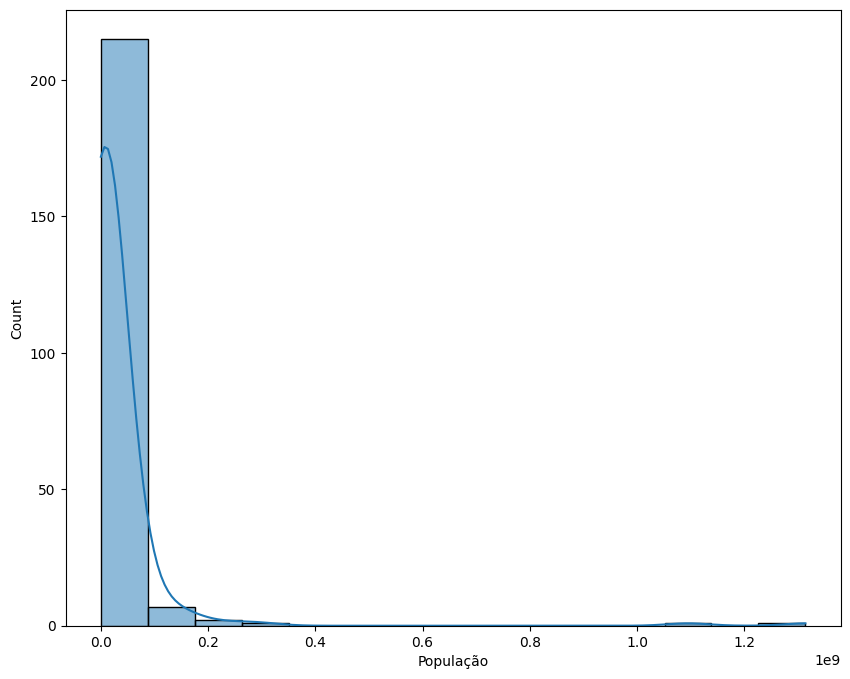

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(dataset['População'], bins=15, kde=True);
plt.show()

In [ ]:
# sns.pairplot(dataset);

<Axes: xlabel='População', ylabel='Renda Per capita ($)'>

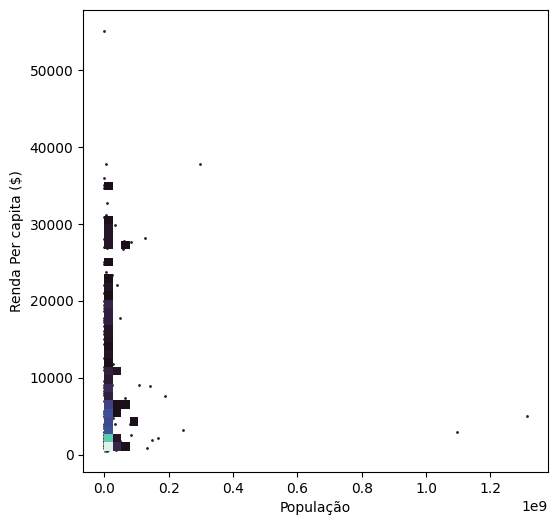

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], s=5, color=".15")
sns.histplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], bins=50, pthresh=.1, cmap="mako")
# sns.kdeplot(x=dataset['População'], y=dataset['Renda Per capita ($)'], levels=5, color="w", linewidths=1)

<ipython-input-16-d4d643d72d3a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
<ipython-input-16-d4d643d72d3a>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),


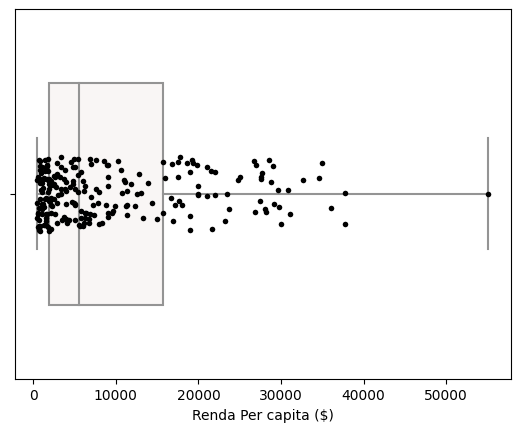

In [ ]:
# BOXPLOT DA RENDA PER CAPITA ($) AGRUPADO POR PAÍS

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Renda Per capita ($)", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

<ipython-input-17-90b5e7cbf8ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
<ipython-input-17-90b5e7cbf8ca>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),


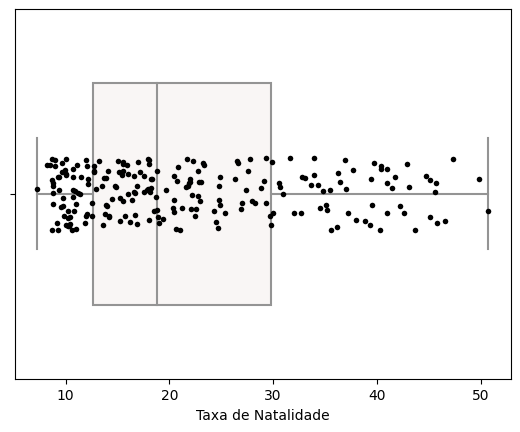

In [ ]:
# BOXPLOT DA TAXA DE NATALIDADE AGRUPADO POR PAÍS

sns.boxplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Natalidade", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

<ipython-input-18-b718b6de3fe9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.boxplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
<ipython-input-18-b718b6de3fe9>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),


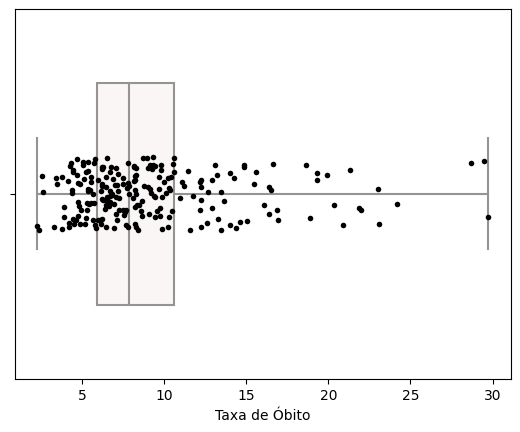

In [ ]:
# BOXPLOT DA TAXA DE ÓBITO AGRUPADO POR PAÍS
sns.boxplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
            whis=[0, 100], width=.6, palette="vlag"); 

# Add in points to show each observation
sns.stripplot(x="Taxa de Óbito", data=dataset.groupby(['País']).mean(),
              size=4, color="0", linewidth=0);

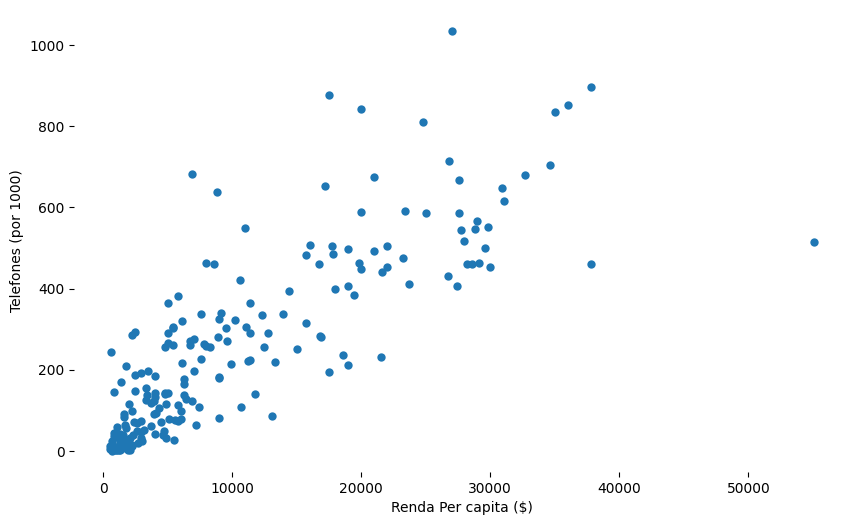

In [ ]:
# Scatter do número de telefone (por 1000 habitantes) vs Renda per Capita

f, ax = plt.subplots(figsize=(10, 6))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="Renda Per capita ($)", y="Telefones (por 1000)",
                sizes=(1, 8), linewidth=0,
                data=dataset, ax=ax);

"""

Podemos observar que país nos quais a renda per capita ($) é alta, temos maior quantidade de telefones.

"""

In [ ]:
# Salvando o dataset no formato csv (tratado)
dataset.to_csv("countries of the world (tratado).csv", sep=";")

---

# 4. Base (tratada)
## Nessa parte do projeto, trabalhamos com a base tratada, não necessitando realizar os tratamentos posteriores novamente.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
dataset = pd.read_csv("countries of the world (tratado).csv", sep=";")

In [3]:
dataset.drop(columns="Unnamed: 0", axis = 1, inplace = True)

In [4]:
dataset.head()

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,8.71,6.25


In [5]:
dataset[dataset['Renda Per capita ($)'] >= 20000]

# 29000.0 565.5	

,País,Região,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,11.03,6.68
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,12.14,7.51
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,8.74,9.76
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.0,462.6,10.38,10.27
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,11.40,7.74
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,10.78,7.80
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,12.74,4.89
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,11.13,10.36
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,14.05,8.70
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,10.45,9.86


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   País                                                 227 non-null    object 
 1   Região                                               227 non-null    object 
 2   População                                            227 non-null    int64  
 3   Área (Km)                                            227 non-null    int64  
 4   Densidade Populacional                               227 non-null    float64
 5   Área Costeira (costa/Área)                           227 non-null    float64
 6   Taxa de Migração                                     224 non-null    float64
 7   Taxa de Mortalidade Infantil (por 1000 nascimentos)  224 non-null    float64
 8   Renda Per capita ($)                                 226 non-null    f

In [7]:
# Verificando os valores vazios
dataset.isnull().sum()

País                                                    0
Região                                                  0
População                                               0
Área (Km)                                               0
Densidade Populacional                                  0
Área Costeira (costa/Área)                              0
Taxa de Migração                                        3
Taxa de Mortalidade Infantil (por 1000 nascimentos)     3
Renda Per capita ($)                                    1
Taxa de Alfabetização (%)                              18
Telefones (por 1000)                                    4
Taxa de Natalidade                                      3
Taxa de Óbito                                           4
dtype: int64

In [8]:
# Substituindo os valores NaN pela média dos valores de cada coluna

dataset['Renda Per capita ($)'].fillna(np.mean(dataset['Renda Per capita ($)']), inplace = True)
dataset['Taxa de Alfabetização (%)'].fillna(np.mean(dataset['Taxa de Alfabetização (%)']), inplace = True)
dataset['Telefones (por 1000)'].fillna(np.mean(dataset['Telefones (por 1000)']), inplace = True)

dataset['Taxa de Migração'].fillna(np.mean(dataset['Taxa de Migração']), inplace = True)
dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].fillna(np.mean(dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)']), inplace = True)
dataset['Taxa de Natalidade'].fillna(np.mean(dataset['Taxa de Natalidade']), inplace = True)
dataset['Taxa de Óbito'].fillna(np.mean(dataset['Taxa de Óbito']), inplace = True)

In [9]:
# Após o tratamendo dos valores faltantes podemos verificar que não temos mais nenhuma coluna com dados missing.

dataset.isnull().sum()

País                                                   0
Região                                                 0
População                                              0
Área (Km)                                              0
Densidade Populacional                                 0
Área Costeira (costa/Área)                             0
Taxa de Migração                                       0
Taxa de Mortalidade Infantil (por 1000 nascimentos)    0
Renda Per capita ($)                                   0
Taxa de Alfabetização (%)                              0
Telefones (por 1000)                                   0
Taxa de Natalidade                                     0
Taxa de Óbito                                          0
dtype: int64

### Regressão Linear Simples (*Telefones* em função da *Renda Per Capita ($)*)

In [10]:
## Vamos dividir a base com os valores que queremos 

from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 8].values
y = dataset.iloc[:, 10].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Reshaping data

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1) 

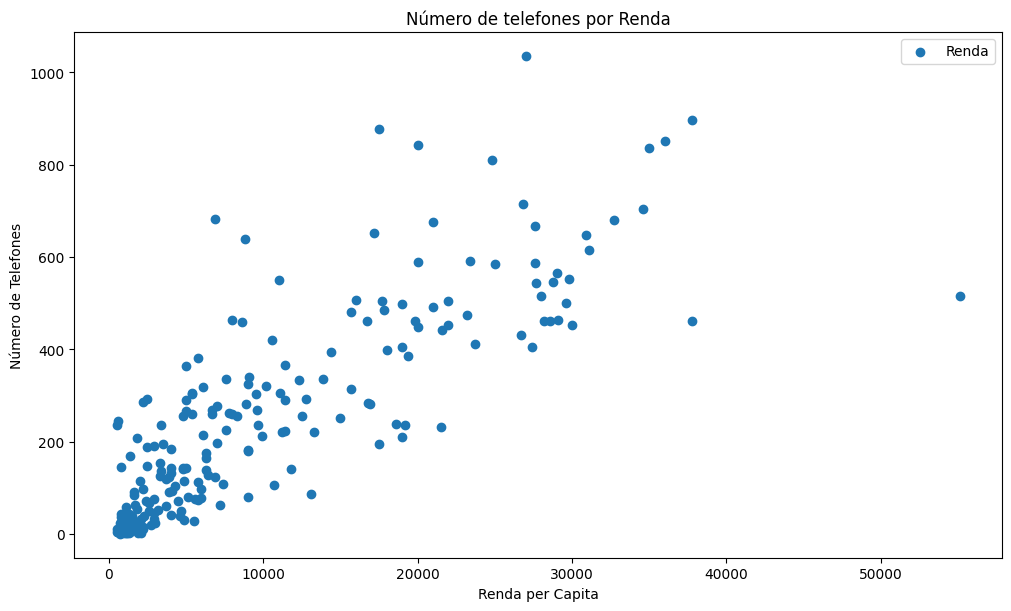

In [11]:
# Vamos agora, realizar o treinamento do modelo de Regressão Linear Simples

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter("Renda Per capita ($)", "Telefones (por 1000)", label = "Renda", data = dataset)
# ax.plot("Renda Per capita ($)", "Telefones (por 1000)", label = "Telefones", data = dataset)
ax.set_title("Número de telefones por Renda")

ax.set_xlabel('Renda per Capita')
ax.set_ylabel('Número de Telefones')
ax.legend();

# Não pode conter Na >>>  ValueError: array must not contain infs or NaNs
# r = pearsonr(X, y)
# print(f'Coeficiente de correlação: {r}')

### treinando o regressor

In [12]:
reg = LinearRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

Coeficiente r2: 0.66831716463014 



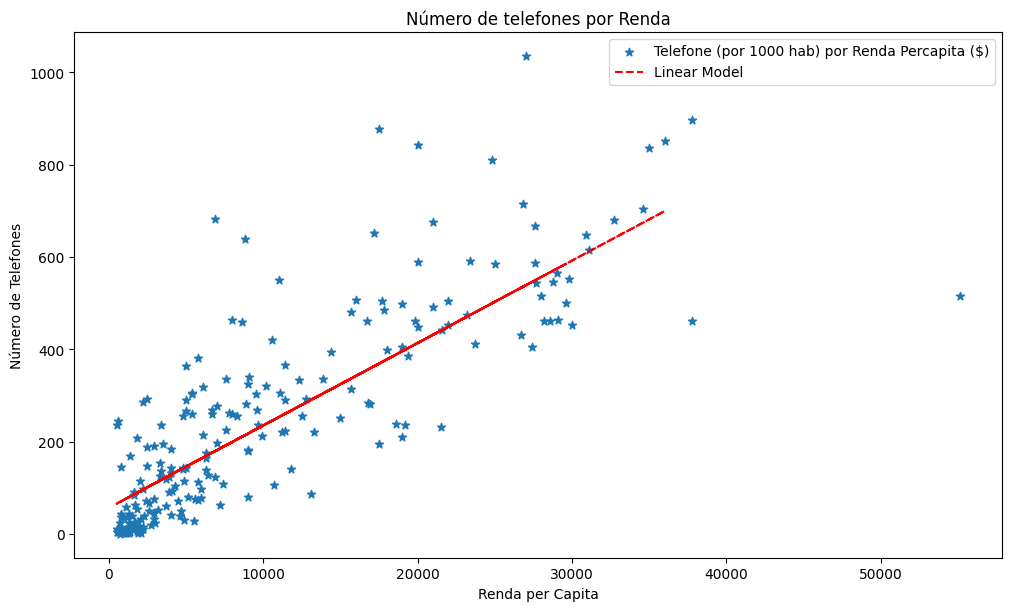

In [13]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, pred)
print(f'Coeficiente r2: {r_squared}', '\n')

##### GRÁFICO #######
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""


f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = '*', label = 'Telefone (por 1000 hab) por Renda Percapita ($)')
ax.plot(X_test, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Renda per Capita')
ax.set_ylabel('Número de Telefones')
ax.set_title("Número de telefones por Renda")

ax.legend();
plt.show()

In [14]:
# Coeficiente Angular
reg.coef_

array([[0.01786274]])

In [15]:
# Coeficiente Linear
reg.intercept_

array([56.49063901])

In [16]:
# Alterando a ordem das colunas >> Região e País passam a ser as últimas colunas 

colunas = dataset.columns.to_list()
colunas = ['População', 'Área (Km)', 'Densidade Populacional', 'Área Costeira (costa/Área)',
 'Taxa de Migração', 'Taxa de Mortalidade Infantil (por 1000 nascimentos)', 'Renda Per capita ($)',
 'Taxa de Alfabetização (%)', 'Telefones (por 1000)', 'Taxa de Natalidade', 'Taxa de Óbito', 'Região', 'País']

dataset = dataset[colunas]

In [17]:
dataset.head()

,População,Área (Km),Densidade Populacional,Área Costeira (costa/Área),Taxa de Migração,Taxa de Mortalidade Infantil (por 1000 nascimentos),Renda Per capita ($),Taxa de Alfabetização (%),Telefones (por 1000),Taxa de Natalidade,Taxa de Óbito,Região,País
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,46.60,20.34,ASIA (EX. NEAR EAST),Afghanistan
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,15.11,5.22,EASTERN EUROPE,Albania
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,17.14,4.61,NORTHERN AFRICA,Algeria
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,22.46,3.27,OCEANIA,American Samoa
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,8.71,6.25,WESTERN EUROPE,Andorra


In [18]:
# Vamos transformar agora a coluna País em formato numérico
## Neste caso estamos trabalhando com uma variável categórica, e para colocarmos ela em algum modelo, 
## precisamos tranformá-la em variável numérica. Por meio do labelEncoder, podemos realizar esse tipo de transformação

from sklearn.preprocessing import LabelEncoder

y_compl = dataset.iloc[:, 12].values

label_Pais = LabelEncoder()

y_compl = label_Pais.fit_transform(y_compl)

In [19]:
# Podemos observar que agora temos 227 países (0 - 226)
y_compl

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 143, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 191, 174, 175, 176, 177, 178, 17

In [20]:
# convertendo um país (número) para o valor original (categórico)
## Por meio do .inverse_transform podemos verificar quais países, cada número representa 
list(label_Pais.inverse_transform([0, 1, 2, 224, 225, 226])) # ... n ... 

['Afghanistan ', 'Albania ', 'Algeria ', 'Yemen ', 'Zambia ', 'Zimbabwe ']

In [21]:
# Agora vamos adicionar à variável X_compl e selecionar apenas os valores da coluna de índice 10  

X_compl = dataset.iloc[:, 8].values
X_compl

array([3.20000000e+00, 7.12000000e+01, 7.81000000e+01, 2.59500000e+02,
       4.97200000e+02, 7.80000000e+00, 4.60000000e+02, 5.49900000e+02,
       2.20400000e+02, 1.95700000e+02, 5.16100000e+02, 5.65500000e+02,
       4.52200000e+02, 1.37100000e+02, 4.60600000e+02, 2.81300000e+02,
       7.30000000e+00, 4.81900000e+02, 3.19100000e+02, 4.62600000e+02,
       1.15700000e+02, 9.70000000e+00, 8.51400000e+02, 1.43000000e+01,
       7.19000000e+01, 2.15400000e+02, 8.05000000e+01, 2.25300000e+02,
       5.06500000e+02, 2.37200000e+02, 3.36300000e+02, 7.00000000e+00,
       1.01000000e+01, 3.40000000e+00, 2.60000000e+00, 5.70000000e+00,
       5.52200000e+02, 1.69600000e+02, 8.36300000e+02, 2.30000000e+00,
       1.30000000e+00, 2.13000000e+02, 2.66700000e+02, 1.76200000e+02,
       2.45000000e+01, 2.00000000e-01, 3.70000000e+00, 2.89900000e+02,
       3.40700000e+02, 1.46000000e+01, 4.20400000e+02, 7.47000000e+01,
       2.36061435e+02, 3.14300000e+02, 6.14600000e+02, 2.28000000e+01,
      

In [22]:
## Dividimos então em variáveis de treino e variáveis de teste (X e y)

X_train_compl, X_test_compl, y_train_compl, y_test_compl = train_test_split(X_compl, y_compl) 

# Precisamos realizar um Reshaping dos dados.
### O .reshape dá um novo formato ao array utilizado sem que os dados obtidos sejam modificados

X_train_compl = X_train_compl.reshape(-1, 1)
X_test_compl = X_test_compl.reshape(-1, 1)
y_train_compl = y_train_compl.reshape(-1, 1)
y_test_compl = y_test_compl.reshape(-1, 1) 

## E agora treinamos um novo modelo de regressão linear com esses novos dados
reg = LinearRegression().fit(X_train_compl, y_train_compl)
pred = reg.predict(X_test_compl)

Coeficiente r2: 0.003248607432356443 



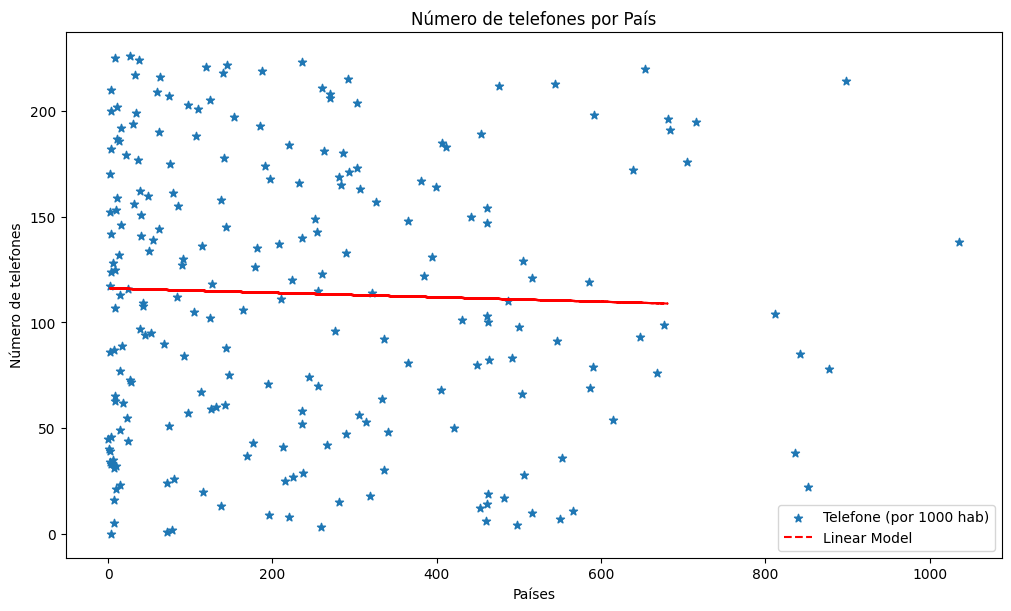

In [23]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_compl, pred)
print(f'Coeficiente r2: {r_squared}', '\n')

##### GRÁFICO #######
"""
Esse modelo foi construído com base em duas colunas. Países e Número de Telefone.
Podemos observar que entre os países não houve uma variação muito significativa.
"""


f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X_compl, y_compl, marker = '*', label = 'Telefone (por 1000 hab)')
# Com base nos valores de Teste e nos valores previstos, podemos plotar o nosso regressor sobre o
ax.plot(X_test_compl, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Países')
ax.set_ylabel('Número de telefones')
ax.set_title("Número de telefones por País")

ax.legend();
plt.show()

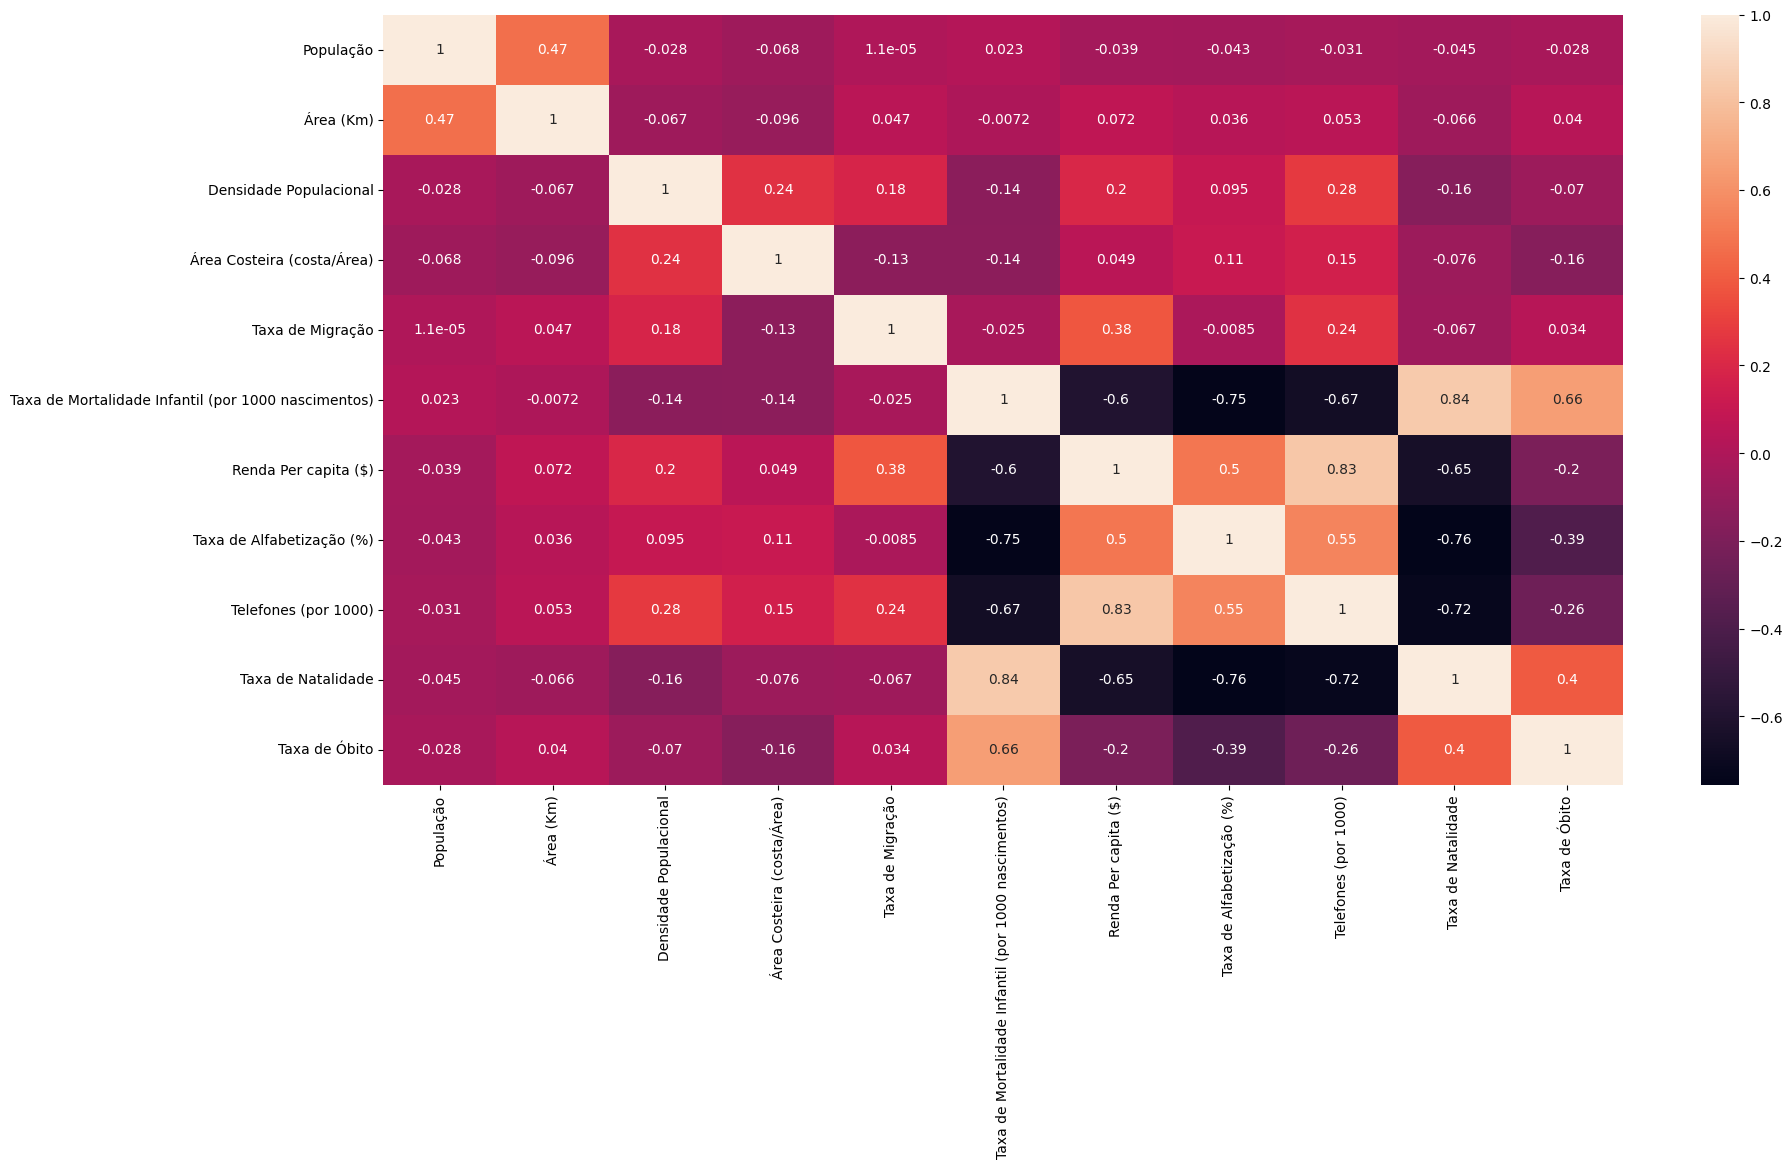

In [24]:
# Heatmap, que mostra a correlação de Pearson para cada coluna do dataframe

"""
Podemos observar que as correlações negativas estão apresentadas na cor mais escura. As correlações negativas, mostram que 
elas são inversamente proporcionais, enquanto uma variável cresce a outra diminui. 

Já as variáveis com correlação positiva, mostram que ambas crescem de forma proporcional aos valores observados.
"""

plt.figure(figsize = (20, 10))
sns.heatmap(dataset.corr(numeric_only = True), annot = True);

---

# 5. Relação entre Atributos

---

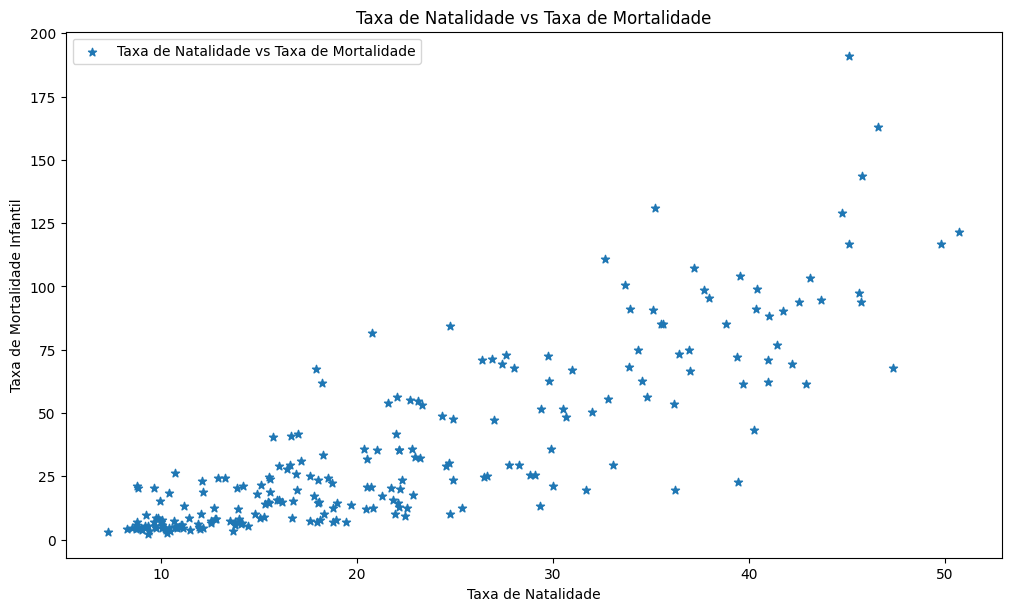

In [25]:
##### GRÁFICO #######
### Vamos verificar a linearidade de taxa da mortalidade com taxa de natalidade
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(dataset['Taxa de Natalidade'].values, dataset['Taxa de Mortalidade Infantil (por 1000 nascimentos)'].values, 
           marker = '*', label = 'Taxa de Natalidade vs Taxa de Mortalidade')

ax.set_xlabel('Taxa de Natalidade')
ax.set_ylabel('Taxa de Mortalidade Infantil')
ax.set_title("Taxa de Natalidade vs Taxa de Mortalidade")

ax.legend();
plt.show()

In [26]:
## Vamos dividir a base com os valores que queremos 
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 9].values
y = dataset.iloc[:, 5].values

X_train_taxa_natalidade, X_test_taxa_natalidade, y_train_taxa_natalidade, y_test_taxa_natalidade = train_test_split(X, y, 
                                                                                                                    test_size = 0.2, 
                                                                                                                    random_state = 42)

# Reshaping data

X_train_taxa_natalidade = X_train_taxa_natalidade.reshape(-1, 1)
X_test_taxa_natalidade = X_test_taxa_natalidade.reshape(-1, 1)
y_train_taxa_natalidade = y_train_taxa_natalidade.reshape(-1, 1)
y_test_taxa_natalidade = y_test_taxa_natalidade.reshape(-1, 1) 

In [27]:
reg = LinearRegression().fit(X_train_taxa_natalidade, y_train_taxa_natalidade)
pred = reg.predict(X_test_taxa_natalidade)

Coeficiente r2: 0.8111063731243587 



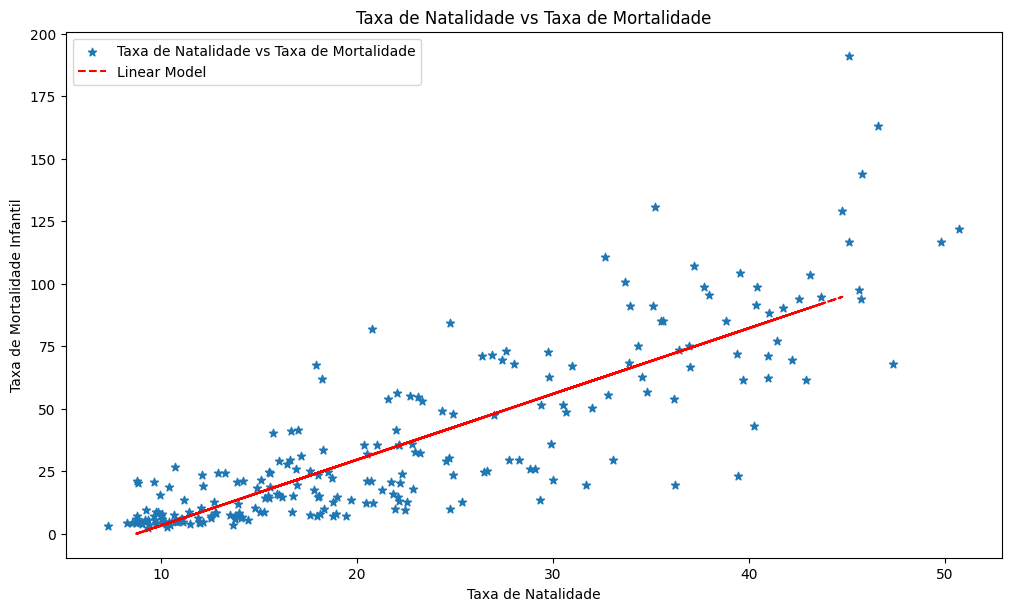

In [28]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test_taxa_natalidade, pred)
print(f'Coeficiente r2: {r_squared}', '\n')


##### GRÁFICO #######
### Vamos verificar a linearidade de taxa da mortalidade com taxa de natalidade
"""
Esse modelo foi construído com base em duas colunas. Renda per Capita e Número de Telefone.
"""

f, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(X, y, marker = '*', 
           label = 'Taxa de Natalidade vs Taxa de Mortalidade')
ax.plot(X_test_taxa_natalidade, pred, 'r--', label = 'Linear Model')

ax.set_xlabel('Taxa de Natalidade')
ax.set_ylabel('Taxa de Mortalidade Infantil')
ax.set_title("Taxa de Natalidade vs Taxa de Mortalidade")

ax.legend();
plt.show()

In [29]:
# Coeficiente Angular
reg.coef_

array([[2.62974971]])

In [30]:
# Coeficiente Linear
reg.intercept_

array([-23.03142165])

In [31]:
## VAMOS ANALISAR O ERRO DO REGRESSOR

from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(X_test_taxa_natalidade, pred)
MSE = mean_squared_error(X_test_taxa_natalidade, pred)
RMSE = mean_squared_error(X_test_taxa_natalidade, pred, squared = False)

print(f"O valor do Mean Absolute Error: {MAE}")
print(f"O valor do Mean Squared Error: {MSE}")
print(f"O valor do Root Mean Squared Error: {RMSE}")

O valor do Mean Absolute Error: 17.752579270319362
O valor do Mean Squared Error: 557.500622332229
O valor do Root Mean Squared Error: 23.611451084849254




---


#6. Clusterização


---



In [32]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = dataset.copy()
X = dataset.iloc[:, 9:11].values

X

In [34]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [35]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

In [36]:
dataframe = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
rotulos = dataframe.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


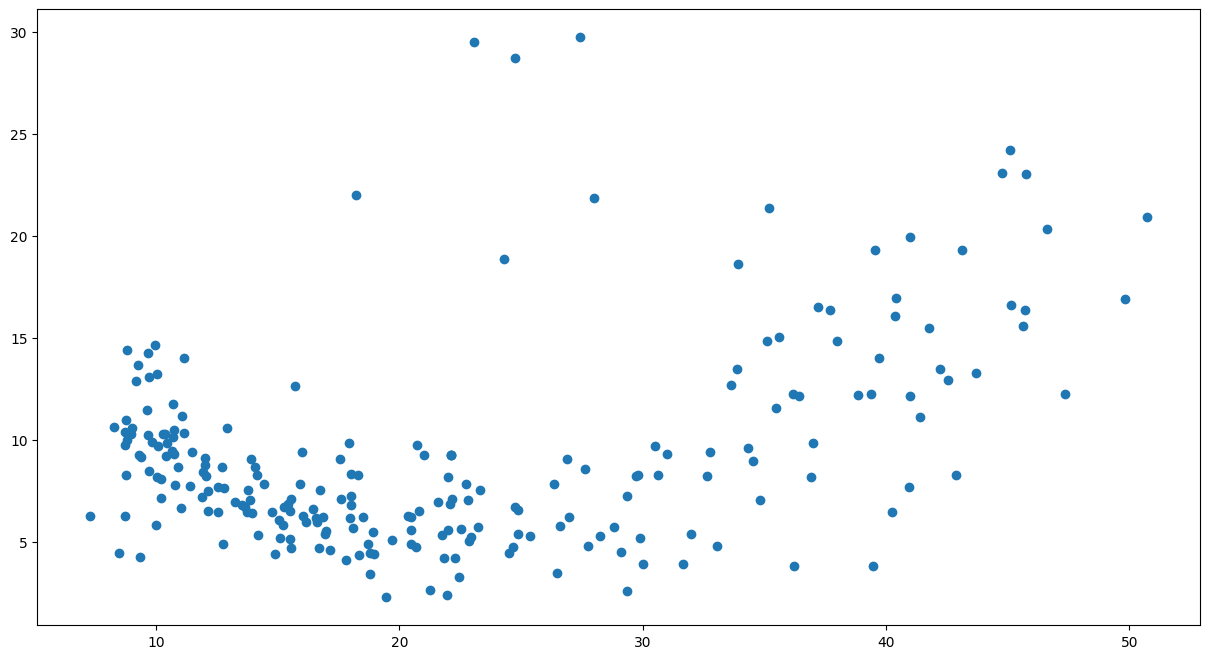

In [37]:
plt.figure(figsize=(15,8))
plt.scatter(x = X[:,0], y = X[:, 1])
plt.show()

In [38]:
dados_normalizados = StandardScaler()
dataset_normalizado = dados_normalizados.fit_transform(X)

dataset_normalizado

array([[ 2.21029964e+00,  2.24907510e+00],
       [-6.32321321e-01, -8.14901248e-01],
       [-4.49072018e-01, -9.38514050e-01],
       [ 3.11675340e-02, -1.21005693e+00],
       [-1.21005311e+00, -6.06177991e-01],
       [ 2.07579645e+00,  3.03128070e+00],
       [-7.17175678e-01, -7.90583975e-01],
       [-4.68028842e-01, -7.84504657e-01],
       [-4.86082961e-01, -3.42740871e-01],
       [-9.06743922e-01, -2.04942993e-01],
       [-1.00062534e+00, -5.19041098e-01],
       [-9.00424980e-01, -3.50846629e-01],
       [-1.20734499e+00,  1.05102233e-01],
       [-1.24097885e-01,  1.03075793e-01],
       [-4.10255663e-01, -3.87749635e-02],
       [-3.89493427e-01, -1.03375670e+00],
       [ 6.93753683e-01, -1.96837235e-01],
       [-8.48970743e-01, -1.15779660e-01],
       [-9.88890161e-01,  9.68365411e-01],
       [-1.05930122e+00,  2.08450641e-01],
       [ 6.07093914e-01, -7.13579278e-01],
       [ 1.51070254e+00,  6.03606321e-01],
       [-9.67225219e-01, -3.04238523e-01],
       [ 1.

In [39]:
kmeans_normalizados = KMeans(n_clusters=3)
kmeans_normalizados.fit(dataset_normalizado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [40]:
centroides = kmeans_normalizados.cluster_centers_
centroides

array([[-0.82878823, -0.18949122],
       [ 1.47644271,  1.64119153],
       [ 0.37272793, -0.63520397]])

In [41]:
rotulos = kmeans_normalizados.labels_
rotulos

array([1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 1, 1], dtype=int32)

In [42]:
grafico1 = px.scatter(x = dataset_normalizado[:,0], y = dataset_normalizado[:,1], color=rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [9, 9, 9])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

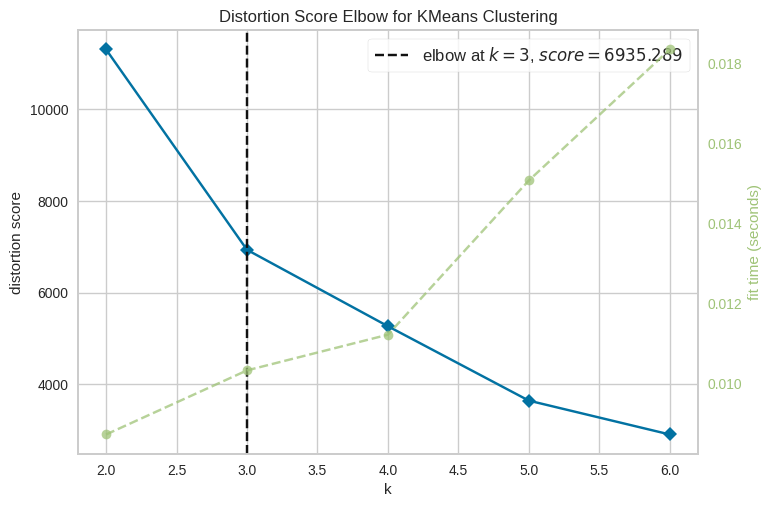

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(kmeans_normalizados)
visualizer = KElbowVisualizer(model, k=6)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() ;

In [44]:
visualizer.elbow_score_

6935.289378282175